In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, model_from_json
from keras.optimizers import RMSprop,Adam,SGD
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.wrappers.scikit_learn import KerasClassifier
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn
import h5py, glob, re
import numpy as np
import itertools, random
from cnn_utils import *
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

np.random.seed(1)
# Setting the seed for python random numbers
random.seed(1254)
# Setting the graph-level random seed.
tf.random.set_seed(89)
from keras import backend as K
# session_conf = tf.ConfigProto(
#       intra_op_parallelism_threads=1,
#       inter_op_parallelism_threads=1)

#Force Tensorflow to use a single thread
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)

# K.set_session(sess)

C:\Users\ekurtoglu\AppData\Local\Continuum\anaconda3\envs\env\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


##### RGB 2 Gray

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Load Data

In [47]:
datapath = 'datasets/128x128/*.hdf5'
all_data = glob.glob(datapath)

ganpath = 'datasets/GAN/*.hdf5'
gandata = glob.glob(ganpath)

data_10 = h5py.File(all_data[0], "r")
data_24 = h5py.File(all_data[1], "r")
data_tobb = h5py.File(all_data[2], "r")
data_77 = h5py.File(all_data[3], "r")

data_77_gan = h5py.File(gandata[0],'r') 

# test_path4 = 'Tobb_dataset/tobb_dataset_128x128.hdf5' # file path for TOBB data  
# testset4   = h5py.File(test_path4, "r")
print('Real Dataset: '+str(all_data))
X_train_10 = np.array(data_10["train_img"])
Y_train_10 = np.array(data_10["train_labels"])
# X_valid_orig = np.array(validset["valid_img"])
# Y_valid_orig = np.array(validset["valid_labels"])
X_test_10 = np.array(data_10["test_img"])
Y_test_10 = np.array(data_10["test_labels"])
print('10 ghz Dataset''s Number of training samples: ', len(Y_train_10))
# print('1. Radar''s Number of validation samples: ', len(X_valid_orig))
print('10 ghz Dataset''s Number of test samples: ', len(Y_test_10))

X_train_24 = np.array(data_24["train_img"])
Y_train_24 = np.array(data_24["train_labels"])
# X_valid_orig2 = np.array(validset2["valid_img"])
# Y_valid_orig2 = np.array(validset2["valid_labels"])
X_test_24 = np.array(data_24["test_img"])
Y_test_24 = np.array(data_24["test_labels"])
print('24 ghz Dataset''s Number of training samples: ', len(X_train_24))
# print('2. Radar''s Number of validation samples: ', len(X_valid_orig2))
print('24 ghz Dataset''s Number of test samples: ', len(X_test_24))

X_train_77 = np.array(data_77["train_img"])
Y_train_77 = np.array(data_77["train_labels"])
# X_valid_orig3 = np.array(validset3["valid_img"])
# Y_valid_orig3 = np.array(validset3["valid_labels"])
X_test_77 = np.array(data_77["test_img"])
Y_test_77 = np.array(data_77["test_labels"])
print('77 ghz Dataset''s Number of training samples: ', len(X_train_77))
# print('3. Radar''s Number of validation samples: ', len(X_valid_orig3))
print('77. Dataset''s Number of test samples: ', len(X_test_77))


X_train_tobb = np.array(data_tobb["train_img"])
Y_train_tobb = np.array(data_tobb["train_labels"])
# X_valid_orig3 = np.array(validset3["valid_img"])
# Y_valid_orig3 = np.array(validset3["valid_labels"])
X_test_tobb = np.array(data_tobb["test_img"])
Y_test_tobb = np.array(data_tobb["test_labels"])
print('4 ghz Dataset''s Number of training samples: ', len(X_train_tobb))
# print('4. Radar''s Number of validation samples: ', len(X_valid_orig4))
print('4 ghz Dataset''s Number of test samples: ', len(X_test_tobb))

print('GAN Dataset: '+str(gandata))

X_train_77_gan = np.expand_dims(rgb2gray(np.array(data_77_gan["train_img"])), axis=3)
Y_train_77_gan = np.array(data_77_gan["train_labels"])
# X_valid_orig3 = np.array(validset3["valid_img"])
# Y_valid_orig3 = np.array(validset3["valid_labels"])
X_test_77_gan = np.expand_dims(rgb2gray(np.array(data_77_gan["test_img"])), axis=3)
Y_test_77_gan = np.array(data_77_gan["test_labels"])
print('77 ghz GAN Dataset''s Number of training samples: ', len(X_train_77_gan))
# print('3. Radar''s Number of validation samples: ', len(X_valid_orig3))
print('77. GAN Dataset''s Number of test samples: ', len(X_test_77_gan))

data_10.close()
data_24.close()
data_77.close()
data_tobb.close()
data_77_gan.close()

Real Dataset: ['datasets/128x128\\10ghz_11class_128x128.hdf5', 'datasets/128x128\\24ghz_11class_128x128.hdf5', 'datasets/128x128\\4ghz_11class_128x128.hdf5', 'datasets/128x128\\77ghz_11class_128x128.hdf5']
10 ghz Datasets Number of training samples:  588
10 ghz Datasets Number of test samples:  147
24 ghz Datasets Number of training samples:  1483
24 ghz Datasets Number of test samples:  636
77 ghz Datasets Number of training samples:  519
77. Datasets Number of test samples:  130
4 ghz Datasets Number of training samples:  564
4 ghz Datasets Number of test samples:  243
GAN Dataset: ['datasets/GAN\\77_GAN_128x128.hdf5']
77 ghz GAN Datasets Number of training samples:  2031
77. GAN Datasets Number of test samples:  131


## Examine the shapes of data

In [48]:
num_class = 11

In [49]:
x_train_10 = X_train_10/255.
# X_valid = X_valid_orig/255.
x_test_10 = X_test_10/255.
y_train_10 = convert_to_one_hot(Y_train_10, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_10 = convert_to_one_hot(Y_test_10, num_class).T
print ("X_train_10 shape: " + str(x_train_10.shape))
print ("Y_train_10 shape: " + str(y_train_10.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_10 shape: " + str(x_test_10.shape))
print ("Y_test_10 shape: " + str(y_test_10.shape)+"\n\n")

x_train_24 = X_train_24/255.
# X_valid = X_valid_orig/255.
x_test_24 = X_test_24/255.
y_train_24 = convert_to_one_hot(Y_train_24, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_24 = convert_to_one_hot(Y_test_24, num_class).T
print ("X_train_24 shape: " + str(x_train_24.shape))
print ("Y_train_24 shape: " + str(y_train_24.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_24 shape: " + str(x_test_24.shape))
print ("Y_test_24 shape: " + str(y_test_24.shape)+"\n\n")

x_train_77 = X_train_77/255.
# X_valid = X_valid_orig/255.
x_test_77 = X_test_77/255.
y_train_77 = convert_to_one_hot(Y_train_77, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_77 = convert_to_one_hot(Y_test_77, num_class).T
print ("X_train_77 shape: " + str(x_train_77.shape))
print ("Y_train_77 shape: " + str(y_train_77.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_77 shape: " + str(x_test_77.shape))
print ("Y_test_77 shape: " + str(y_test_77.shape)+"\n\n")


x_train_tobb = X_train_tobb/255.
# X_valid = X_valid_orig/255.
x_test_tobb = X_test_tobb/255.
y_train_tobb = convert_to_one_hot(Y_train_tobb, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_tobb = convert_to_one_hot(Y_test_tobb, num_class).T
print ("X_train_tobb shape: " + str(x_train_tobb.shape))
print ("Y_train_tobb shape: " + str(y_train_tobb.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_tobb shape: " + str(x_test_tobb.shape))
print ("Y_test_tobb shape: " + str(y_test_tobb.shape)+"\n\n")

x_train_77_gan = X_train_77_gan/255.
# X_valid = X_valid_orig/255.
x_test_77_gan = X_test_77_gan/255.
y_train_77_gan = convert_to_one_hot(Y_train_77_gan, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_77_gan = convert_to_one_hot(Y_test_77_gan, num_class).T
print ("X_train_77_gan shape: " + str(x_train_77_gan.shape))
print ("Y_train_77_gan shape: " + str(y_train_77_gan.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_77_gan shape: " + str(x_test_77_gan.shape))
print ("Y_test_77_gan shape: " + str(y_test_77_gan.shape)+"\n\n")

X_train_10 shape: (588, 128, 128, 3)
Y_train_10 shape: (588, 11)
X_test_10 shape: (147, 128, 128, 3)
Y_test_10 shape: (147, 11)


X_train_24 shape: (1483, 128, 128, 3)
Y_train_24 shape: (1483, 11)
X_test_24 shape: (636, 128, 128, 3)
Y_test_24 shape: (636, 11)


X_train_77 shape: (519, 128, 128, 3)
Y_train_77 shape: (519, 11)
X_test_77 shape: (130, 128, 128, 3)
Y_test_77 shape: (130, 11)


X_train_tobb shape: (564, 128, 128, 3)
Y_train_tobb shape: (564, 11)
X_test_tobb shape: (243, 128, 128, 3)
Y_test_tobb shape: (243, 11)


X_train_77_gan shape: (2031, 128, 128, 1)
Y_train_77_gan shape: (2031, 11)
X_test_77_gan shape: (131, 128, 128, 1)
Y_test_77_gan shape: (131, 11)




# Select Dataset

In [50]:
# set flag: '0' for 10ghz, '1' for 24ghz, '2' for 77ghz and '3' for 4GHz USRP TOBB Data
def select_data(radar):

    if radar==10:
        X_Train = x_train_10
        Y_Train = y_train_10
    #     X_valid = X_valid
    #     Y_valid = Y_valid
        X_Test = x_test_10
        Y_Test = y_test_10
    elif radar==24:
        X_Train = x_train_24
        Y_Train = y_train_24
    #     X_valid = X_valid2
    #     Y_valid = Y_valid2
        X_Test = x_test_24
        Y_Test = y_test_24
    elif radar==77: 
        X_Train = x_train_77
        Y_Train = y_train_77
    #     X_valid = X_valid3
    #     Y_valid = Y_valid3
        X_Test = x_test_77
        Y_Test = y_test_77
    elif radar==4: 
        X_Train = x_train_tobb
        Y_Train = y_train_tobb
    #     X_valid = X_valid4
    #     Y_valid = Y_valid4
        X_Test = x_test_tobb
        Y_Test = y_test_tobb
    elif radar=='77_gan': 
        X_Train = x_train_77_gan
        Y_Train = y_train_77_gan
    #     X_valid = X_valid3
    #     Y_valid = Y_valid3
        X_Test = x_test_77_gan
        Y_Test = y_test_77_gan
    return X_Train, Y_Train, X_Test, Y_Test

## Define Plotting & Saving Function

In [51]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='Training')
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='Validation')
    plt.legend(loc=0)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xlim([1,epochs])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
#     fig.savefig('results/Model'+str(i)+'_'+str(radar)+'GHz'+'_Batchsize'+str(BATCH_SIZE)+'_learning'+str(lr)+'_dropout'+str(drop)+'-acc.png')
    plt.close(fig)
    # summarize history for loss
    fig2 = plt.figure()
    plt.plot(range(1,epochs+1),history.history['loss'],label='Training')
    plt.plot(range(1,epochs+1),history.history['val_loss'],label='Validation')
    plt.legend(loc=0)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xlim([1,epochs])
    plt.grid(True)
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
#     fig2.savefig('results/Model'+str(i)+'_'+str(radar)+'GHz'+'_Batchsize'+str(BATCH_SIZE)+'_learning'+str(lr)+'_dropout'+str(drop)+'-loss.png')
    plt.close(fig2)

# Load Trained Models

In [67]:
radar = 2 # '0' 4ghz, '1' 10ghz, '2' 24 ghz, or '3' 77
# model_addr = glob.glob('models/88x120 CAE/New Models Excel/*.json')
# weight_addr = glob.glob('models/88x120 CAE/New Models Excel/*.h5')
# model_addr = glob.glob('models/GAN/*.json')
# weight_addr = glob.glob('models/GAN/*.h5')
model_addr = glob.glob('models/128x128/Auto/Fine Tuned Models/*.json')
weight_addr = glob.glob('models/128x128/Auto/Fine Tuned Models/*.h5')
print(model_addr)
print(weight_addr)
model_file = model_addr[radar]
weights_file = weight_addr[radar]

json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weights_file)
print(model_file+' & '+weights_file+ " loaded model from disk")
loaded_model.summary()

['models/128x128/Auto/Fine Tuned Models\\10 GHz 20depth 11_class CAE.json', 'models/128x128/Auto/Fine Tuned Models\\24 GHz 20depth 11_class CAE.json', 'models/128x128/Auto/Fine Tuned Models\\77 GHz 20depth 11_class CAE.json', 'models/128x128/Auto/Fine Tuned Models\\77_gan GHz 5depth 64filter11_class GAN CAE.json']
['models/128x128/Auto/Fine Tuned Models\\10 GHz 20depth 11_class CAE.h5', 'models/128x128/Auto/Fine Tuned Models\\24 GHz 20depth 11_class CAE.h5', 'models/128x128/Auto/Fine Tuned Models\\77 GHz 20depth 11_class CAE.h5', 'models/128x128/Auto/Fine Tuned Models\\77_gan GHz 5depth 64filter11_class GAN CAE.h5']
models/128x128/Auto/Fine Tuned Models\77 GHz 20depth 11_class CAE.json & models/128x128/Auto/Fine Tuned Models\77 GHz 20depth 11_class CAE.h5 loaded model from disk
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_4 (Model)              (None, 4, 4, 128)         29

## Create New Model

In [24]:
depth = int((len(loaded_model.layers)-2)/2) # for CAE
print(depth)
# layer_name = 'max_pooling2d_6'
# model2 = Model(inputs=loaded_model.input , outputs=loaded_model.get_layer(layer_name).output)
# model2 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[depth].output) # for CAE
model2 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[-1].output)
model2.summary()

3
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2_input (InputLayer)   (None, 128, 128, 3)       0         
_________________________________________________________________
model_2 (Model)              (None, 4, 4, 128)         2967040   
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                131136    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0 

## Freeze conv layers and add fully connected layers

In [59]:
drop = 0.5 #.5
model = Sequential()

model.add(model2)
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(drop))


model.add(Dense(256, activation='relu'))
model.add(Dropout(drop))

model.add(Dense(num_class))
model.add(Activation('softmax'))


# Freeze the layers except the last 7 layers
for layer in model.layers[:-7]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)
print('Network Summary')
model.summary()

<keras.engine.training.Model object at 0x000001D768DB6DC8> False
<keras.layers.core.Flatten object at 0x000001D76A009FC8> True
<keras.layers.core.Dense object at 0x000001D7AAD2A848> True
<keras.layers.core.Dropout object at 0x000001D7AC522C08> True
<keras.layers.core.Dense object at 0x000001D7AC53D548> True
<keras.layers.core.Dropout object at 0x000001D7ABC12BC8> True
<keras.layers.core.Dense object at 0x000001D77B058408> True
<keras.layers.core.Activation object at 0x000001D794A31148> True
Network Summary
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_81 (Model)             (None, 4, 4, 128)         2967040   
_________________________________________________________________
flatten_81 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_241 (Dense)            (None, 50)                102450    
___

### 21 Mar Cross with fine tuning

In [70]:
print(model_file+' & '+weights_file+ " loaded model from disk")
model3 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[-1].output)

# Freeze the layers except the last 7 layers
for layer in model3.layers[:-7]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in model3.layers:
    print(layer, layer.trainable)
print('Network Summary')
model3.summary()

models/128x128/Auto/Fine Tuned Models\77 GHz 20depth 11_class CAE.json & models/128x128/Auto/Fine Tuned Models\77 GHz 20depth 11_class CAE.h5 loaded model from disk
<keras.engine.input_layer.InputLayer object at 0x000001700606DE08> False
<keras.engine.training.Model object at 0x00000170807CDBC8> False
<keras.layers.core.Flatten object at 0x00000171FD43B808> True
<keras.layers.core.Dense object at 0x000001700607F188> True
<keras.layers.core.Dropout object at 0x0000017000CEF848> True
<keras.layers.core.Dense object at 0x0000017000CEF8C8> True
<keras.layers.core.Dropout object at 0x00000171F635B9C8> True
<keras.layers.core.Dense object at 0x000001700D5E9B88> True
<keras.layers.core.Activation object at 0x00000171F635B5C8> True
Network Summary
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_4_input (InputLayer)   (None, 128, 128, 3)       0         
__________________________________

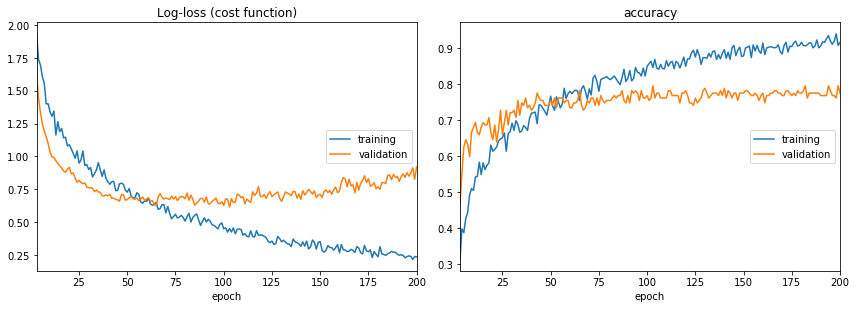

Log-loss (cost function):
training   (min:    0.217, max:    3.067, cur:    0.236)
validation (min:    0.616, max:    1.940, cur:    0.921)

accuracy:
training   (min:    0.170, max:    0.940, cur:    0.917)
validation (min:    0.361, max:    0.796, cur:    0.776)


In [69]:
lr = 0.0002
radar = 10 # set flag: '0' for 10ghz, '1' for 24ghz, '2' for 77ghz, '3' for tobb 4ghz
(X_train, Y_train, X_test, Y_test) = select_data(radar)
optim = Adam(lr=lr, decay=1e-06) # decay rate = 5e-06 for xethru
# optim = Adam(lr=lr) # decay rate = 5e-06 for xethru
# compile the model
model3.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

# fit the model
history = model3.fit(X_train, Y_train,
                batch_size=16,
                epochs=200,
                verbose=1,
                validation_data=(X_test, Y_test),
                shuffle=False,
                callbacks = [PlotLossesCallback()]
                     )

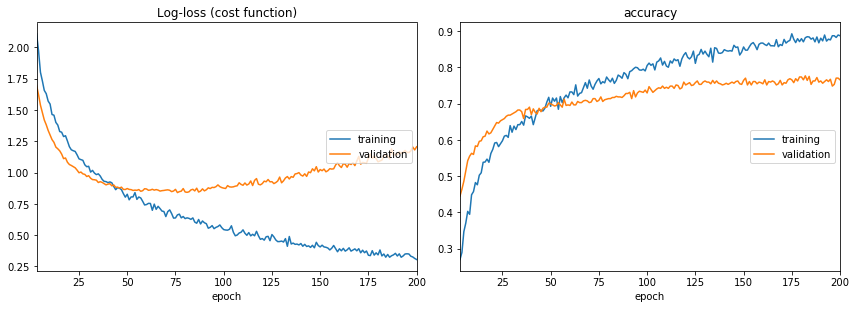

Log-loss (cost function):
training   (min:    0.306, max:    4.225, cur:    0.306)
validation (min:    0.840, max:    2.141, cur:    1.205)

accuracy:
training   (min:    0.205, max:    0.893, cur:    0.887)
validation (min:    0.321, max:    0.777, cur:    0.766)


In [71]:
lr = 0.0002
radar = 24 # set flag: '0' for 10ghz, '1' for 24ghz, '2' for 77ghz, '3' for tobb 4ghz
(X_train, Y_train, X_test, Y_test) = select_data(radar)
optim = Adam(lr=lr, decay=1e-06) # decay rate = 5e-06 for xethru
# optim = Adam(lr=lr) # decay rate = 5e-06 for xethru
# compile the model
model3.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

# fit the model
history = model3.fit(X_train, Y_train,
                batch_size=16,
                epochs=200,
                verbose=1,
                validation_data=(X_test, Y_test),
                shuffle=False,
                callbacks = [PlotLossesCallback()]
                     )

## GAN Models

In [ ]:
# Hyperparams
EPOCHS = 100
BATCH_SIZE = 32
num_class = 11

In [ ]:
lr = 0.001
radar = '77_gan' # set flag: '0' for 10ghz, '1' for 24ghz, '2' for 77ghz, '3' for tobb 4ghz
(X_train, Y_train, X_test, Y_test) = select_data(radar)
# optim = Adam(lr=lr, decay=1e-06) # decay rate = 5e-06 for xethru
optim = Adam(lr=lr) # decay rate = 5e-06 for xethru
# compile the model


# [radar, X_train, Y_train, X_test, Y_test] = select_data(flag) 
# X_train = X_train3
# Y_train = Y_train3
# X_test = X_test2
# Y_test = Y_test2
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

# fit the model
history = model.fit(X_train, Y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                verbose=1,
                validation_data=(X_test, Y_test),
                shuffle=False,
                callbacks = [PlotLossesCallback()]
                     )

# Train for all models and datasets

Dataset: 10 ghz | Model: 28x128\10 GHz 11_class CAE.json | Weight: 28x128\10 GHz 11_class CAE.h5
Accuracy for model & weights for 10 GHz with accuracy of: 0.795918345451355


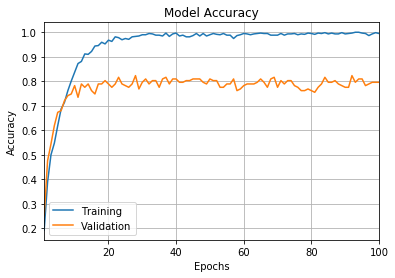

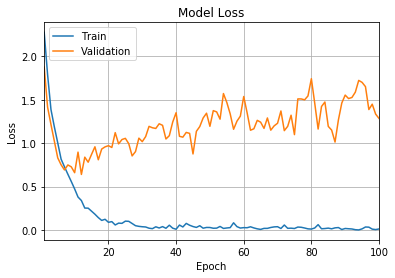

Dataset: 24 ghz | Model: 28x128\24 GHz 11_class CAE.json | Weight: 28x128\24 GHz 11_class CAE.h5
Accuracy for model & weights for 24 GHz with accuracy of: 0.7547169923782349


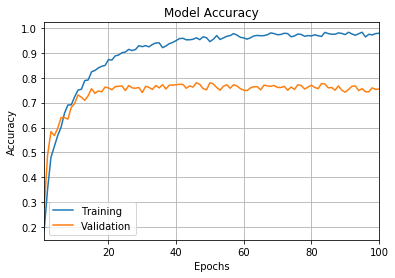

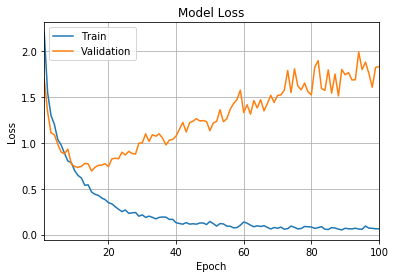

Dataset: 77 ghz | Model: 28x128\77 GHz 11_class CAE.json | Weight: 28x128\77 GHz 11_class CAE.h5
Accuracy for model & weights for 77 GHz with accuracy of: 0.05384615436196327


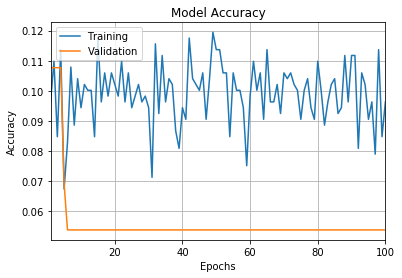

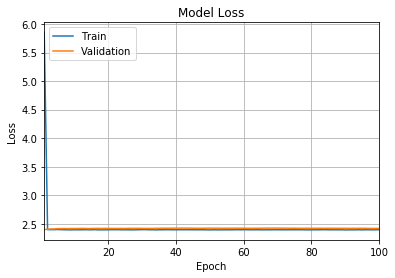

In [57]:
model_addr = glob.glob('models/128x128/Auto/Selected Models/*.json')
weight_addr = glob.glob('models/128x128/Auto/Selected Models/*.h5')

radars = [10,24,77]
acc_hist = []
drop = 0.5
epochs = 200
batch_size = 64 # 32
acc_hist = []
lr = 0.001 # 0.001
optim = Adam(lr=lr)
hist_hist = []
for i in range(len(radars)):
    model_file = model_addr[i]
    weights_file = weight_addr[i]

    json_file = open(model_file, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(weights_file)
    
    model_name = re.split('\\/.',model_file)[-1]
    weight_name = re.split('\\/.',weights_file)[-1]
    
    radar = radars[i] # set flag: '0' for 10ghz, '1' for 24ghz, '2' for 77ghz, '3' for tobb 4ghz
    (X_train, Y_train, X_test, Y_test) = select_data(radar)
    
    print('Dataset: '+str(radar)+' ghz | Model: '+model_name+' | Weight: '+weight_name)
    
    model2 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[12].output)
    
    model = Sequential()

    model.add(model2)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(drop))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(drop))
        
    model.add(Dense(num_class))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

    # fit the model
    history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(X_test, Y_test),
                    shuffle=False
#                     callbacks = [PlotLossesCallback()]
                     )
    acc = history.history['val_accuracy'][-1]
    acc_hist.append(acc)
    hist_hist.append(history)
    print("Accuracy for model & weights for "+str(radars[i])+' GHz with accuracy of: '+str(acc))
    plot_fig(1,hist_hist[i])

# mnist

In [ ]:
from keras.datasets import mnist
from keras import backend as K

(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows = 28
img_cols = 28
num_classes2 = 10

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = convert_to_one_hot(y_train, num_classes2).T
y_test = convert_to_one_hot(y_test, num_classes2).T

MODEL_FILE = "models/88x120 CAE/MNIST CAE.json" # save path
WEIGHT_FILE ="models/88x120 CAE/MNIST CAE.h5" # save path

json_file = open(MODEL_FILE, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(WEIGHT_FILE)

model3 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[2].output)
model3.summary()


In [ ]:

model = Sequential()

model.add(model3)
model.add(Flatten())
model.add(Dense(100, activation='relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

optim = Adam(lr=0.001) # decay rate = 5e-06 for xethru
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
history = model.fit(x_train, y_train,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(x_test, y_test),
                callbacks = [PlotLossesCallback()],
                shuffle=False
                     )

# Grid Search

In [21]:
# fit the model
# 4 ghz Params: epochs= 200, batch_size= 32, dense_size= 256, learn_rate= 0.001, Accuracy=0.8781725764274597
# Model 20 - Params for 24 GHz: epochs= 100, batch_size= 64, dense_size= 256, learn_rate= 0.0002, Accuracy=0.8411949872970581
# Model 15 - Params for 10 GHz: epochs= 100, batch_size= 64, dense_1= 128, dense_2= 128, learn_rate= 0.001, Accuracy=0.8435373902320862
# Model 15 - Params for 10 GHz: epochs= 100, batch_size= 64, dense_1= 256, dense_2= 256, learn_rate= 0.0002, Accuracy=0.8435373902320862
# Model 15 - Params for 77 GHz: epochs= 100, batch_size= 64, dense_1= 256, dense_2= 256, learn_rate= 0.0002, Accuracy=0.8692307472229004
#################################################
#New Models
# Params for 10 GHz: epochs= 100, batch_size= 8, dense_1= 256, dense_2= 256, learn_rate= 0.0001, Accuracy=0.918367326259613
# Params for 24 GHz: epochs= 100, batch_size= 16, dense_1= 64, dense_2= 32, learn_rate= 0.0002, Accuracy=0.9119496941566467
# Params for 77 GHz: epochs= 100, batch_size= 16, dense_1= 64, dense_2= 32, learn_rate= 0.0001, Accuracy=0.9153845906257629

radar = 77 # set flag: '10' for 10ghz, '24' for 24ghz, '2' for 77ghz, '77' for tobb 4ghz
(X_train, Y_train, X_test, Y_test) = select_data(radar)
epochs = [100]
batch_size = [8,16]
dense_1 = [64, 64, 128, 128, 256, 256]
dense_2 = [32, 64, 64, 128, 128, 256]
learn_rate = [0.0002, 0.0001]
acc_hist = []
hist_hist = []
drop = [0.5]

# epochs = [100]
# batch_size = [32]
# dense_1 = [64]
# dense_2 = [32]
# learn_rate = [0.001]
# acc_hist = []
# drop = [0]

model_flag = 2
model_file = model_addr[model_flag]
weights_file = weight_addr[model_flag]

json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(weights_file)

model_name = re.split('\\/.',model_file)[-1]
weight_name = re.split('\\/.',weights_file)[-1]
    
print('Dataset: '+str(radar)+' ghz | Model: '+model_name+' | Weight: '+weight_name)

for i in range(len(epochs)):
    for j in range(len(batch_size)):
        for k in range(len(dense_1)):
            for m in range(len(learn_rate)):
                for n in range(len(drop)):
                
                    model2 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[depth].output)
                    model = Sequential()

                    model.add(model2)
                    model.add(Flatten())
                    model.add(Dense(dense_1[k], activation='relu'))
                    model.add(Dropout(drop[n]))

                    model.add(Dense(dense_2[k], activation='relu'))
                    model.add(Dropout(drop[n]))

                    model.add(Dense(num_class))
                    model.add(Activation('softmax'))

                    optim = Adam(lr=learn_rate[m], decay = 1e-06) # decay rate = 5e-06 for xethru
                    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
                    history = model.fit(X_train, Y_train,
                                    batch_size=batch_size[j],
                                    epochs=epochs[i],
                                    verbose=0,
                                    validation_data=(X_test, Y_test),
                                    shuffle=False
#                                     callbacks = [PlotLossesCallback()]
                                         )
                    acc = history.history['val_accuracy'][-1]
                    acc_hist.append(acc)
                    hist_hist.append(history.history)
                    print('Params for '+str(radar) +' GHz: epochs= '+str(epochs[i])+', batch_size= '+str(batch_size[j])+
                          ', dense_1= '+str(dense_1[k])+', dense_2= '+str(dense_2[k])+', learn_rate= '+str(learn_rate[m])+
                          ', Accuracy='+str(acc))

Dataset: 77 ghz | Model: elected Models\77 GHz 5depth 64filter11_class CAE.json | Weight: elected Models\77 GHz 5depth 64filter11_class CAE.h5
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 32, learn_rate= 0.0002, Accuracy=0.8615384697914124
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 32, learn_rate= 0.0001, Accuracy=0.8538461327552795
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 64, learn_rate= 0.0002, Accuracy=0.892307698726654
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 64, learn_rate= 0.0001, Accuracy=0.892307698726654
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 64, learn_rate= 0.0002, Accuracy=0.8769230842590332
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 64, learn_rate= 0.0001, Accuracy=0.892307698726654
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 128, learn_rate= 0.0002, Accuracy=0.8846153616905212
Params fo

# Save CAE Model

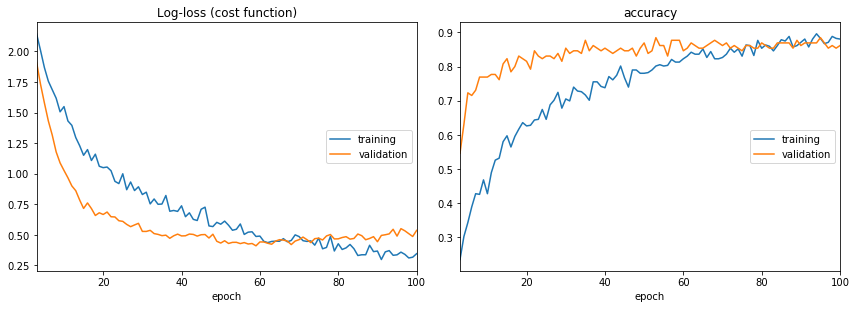

Log-loss (cost function):
training   (min:    0.298, max:    3.128, cur:    0.346)
validation (min:    0.410, max:    2.169, cur:    0.536)

accuracy:
training   (min:    0.150, max:    0.896, cur:    0.881)
validation (min:    0.300, max:    0.885, cur:    0.862)


In [11]:
#New Models
# Params for 10 GHz: epochs= 100, batch_size= 8, dense_1= 256, dense_2= 256, learn_rate= 0.0001, Accuracy=0.918367326259613
# Params for 24 GHz: epochs= 100, batch_size= 16, dense_1= 64, dense_2= 32, learn_rate= 0.0002, Accuracy=0.9119496941566467
# Params for 77 GHz: epochs= 100, batch_size= 16, dense_1= 64, dense_2= 32, learn_rate= 0.0001, Accuracy=0.9153845906257629

radar = 77 # set flag: '10' for 10ghz, '24' for 24ghz, '2' for 77ghz, '77' for tobb 4ghz
(X_train, Y_train, X_test, Y_test) = select_data(radar)
epochs = [100]
batch_size = [16]
dense_1 = [64]
dense_2 = [32]
learn_rate = [0.0001]
drop = [0.5]

model_flag = 2
model_file = model_addr[model_flag]
weights_file = weight_addr[model_flag]

json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(weights_file)

model_name = re.split('\\/.',model_file)[-1]
weight_name = re.split('\\/.',weights_file)[-1]
    
print('Dataset: '+str(radar)+' ghz | Model: '+model_name+' | Weight: '+weight_name)

model2 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[depth].output)
model = Sequential()

model.add(model2)
model.add(Flatten())
model.add(Dense(dense_1[0], activation='relu'))
model.add(Dropout(drop[0]))

model.add(Dense(dense_2[0], activation='relu'))
model.add(Dropout(drop[0]))

model.add(Dense(num_class))
model.add(Activation('softmax'))

optim = Adam(lr=learn_rate[0], decay = 1e-06) # decay rate = 5e-06 for xethru
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                batch_size=batch_size[0],
                epochs=epochs[0],
                verbose=1,
                validation_data=(X_test, Y_test),
                shuffle=False,
                callbacks = [PlotLossesCallback()]
                     )
MODEL_FILE = "models/128x128/Auto/Fine Tuned Models/"+str(radar)+" GHz "+str(depth)+"depth "+str(num_class)+"_class CAE.json" # save path
WEIGHT_FILE ="models/128x128/Auto/Fine Tuned Models/"+str(radar)+" GHz "+str(depth)+"depth "+str(num_class)+"_class CAE.h5" # save path

model_json = model.to_json()
with open(MODEL_FILE, "w") as json_file:
    json_file.write(model_json)
model.save_weights(WEIGHT_FILE)


# Cross Frequency

In [24]:
modelflag = 2
model_addrs = glob.glob('models/128x128/Auto/Fine Tuned Models/*.json')
weight_addrs = glob.glob('models/128x128/Auto/Fine Tuned Models/*.h5')
print(model_addrs)
print(weight_addrs)
model_file = model_addrs[modelflag]
weights_file = weight_addrs[modelflag]

json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weights_file)
print(model_file+' & '+weights_file+ " loaded model from disk")
optim = Adam(lr=0.0001,decay = 1e-06) # decay rate = 5e-06 for xethru
loaded_model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

['models/128x128/Auto/Fine Tuned Models\\10 GHz 20depth 11_class CAE.json', 'models/128x128/Auto/Fine Tuned Models\\24 GHz 20depth 11_class CAE.json', 'models/128x128/Auto/Fine Tuned Models\\77 GHz 20depth 11_class CAE.json']
['models/128x128/Auto/Fine Tuned Models\\10 GHz 20depth 11_class CAE.h5', 'models/128x128/Auto/Fine Tuned Models\\24 GHz 20depth 11_class CAE.h5', 'models/128x128/Auto/Fine Tuned Models\\77 GHz 20depth 11_class CAE.h5']
models/128x128/Auto/Fine Tuned Models\77 GHz 20depth 11_class CAE.json & models/128x128/Auto/Fine Tuned Models\77 GHz 20depth 11_class CAE.h5 loaded model from disk


In [30]:
radar = 77 # set flag: '10' for 10ghz, '24' for 24ghz, '2' for 77ghz, '77' for tobb 4ghz
(X_train, Y_train, X_test, Y_test) = select_data(radar)
print('\n# Evaluate on test data Model #'+str(modelflag))
results = loaded_model.evaluate(X_train, Y_train, batch_size=16)
print('test loss, test acc:', results)


# Evaluate on test data Model #2
519/519 [==============================] - 1s 2ms/step
test loss, test acc: [0.0037889687952528095, 1.0]


# CNN Grid Search

In [32]:
# Params for 10 GHz: epochs= 100, batch_size= 16, dense_1= 64, dense_2= 64, learn_rate= 0.0002, Accuracy=0.9115646481513977

radar = 10 # set flag: '10' for 10ghz, '24' for 24ghz, '2' for 77ghz, '77' for tobb 4ghz
(X_train, Y_train, X_test, Y_test) = select_data(radar)
epochs = [100]
batch_size = [8,16]
dense_1 = [64, 64, 128, 128, 256, 256]
dense_2 = [32, 64, 64, 128, 128, 256]
learn_rate = [0.0002, 0.0001]
acc_hist = []
hist_hist = []
drop = [0.5]

# epochs = [100]
# batch_size = [32]
# dense_1 = [64]
# dense_2 = [32]
# learn_rate = [0.001]
# acc_hist = []
# drop = [0]

model_flag = 0
model_file = model_addr[model_flag]
weights_file = weight_addr[model_flag]

json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# loaded_model.load_weights(weights_file)

model_name = re.split('\\/.',model_file)[-1]
weight_name = re.split('\\/.',weights_file)[-1]
    
print('Dataset: '+str(radar)+' ghz | Model: '+model_name+' | Weight: '+weight_name)

for i in range(len(epochs)):
    for j in range(len(batch_size)):
        for k in range(len(dense_1)):
            for m in range(len(learn_rate)):
                for n in range(len(drop)):
                

                    model2 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[depth].output)
                    model = Sequential()

                    model.add(model2)
                    model.add(Flatten())
                    model.add(Dense(dense_1[k], activation='relu'))
                    model.add(Dropout(drop[n]))

                    model.add(Dense(dense_2[k], activation='relu'))
                    model.add(Dropout(drop[n]))

                    model.add(Dense(num_class))
                    model.add(Activation('softmax'))

                    optim = Adam(lr=learn_rate[m], decay = 1e-06) # decay rate = 5e-06 for xethru
                    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
                    history = model.fit(X_train, Y_train,
                                    batch_size=batch_size[j],
                                    epochs=epochs[i],
                                    verbose=0,
                                    validation_data=(X_test, Y_test),
                                    shuffle=False
#                                     callbacks = [PlotLossesCallback()]
                                         )
                    acc = history.history['val_accuracy'][-1]
                    acc_hist.append(acc)
                    hist_hist.append(history.history)
                    print('Params for '+str(radar) +' GHz: epochs= '+str(epochs[i])+', batch_size= '+str(batch_size[j])+
                          ', dense_1= '+str(dense_1[k])+', dense_2= '+str(dense_2[k])+', learn_rate= '+str(learn_rate[m])+
                          ', Accuracy='+str(acc))

Dataset: 10 ghz | Model: elected Models\10 GHz 5depth 64filter11_class CAE.json | Weight: elected Models\10 GHz 5depth 64filter11_class CAE.h5
Params for 10 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 32, learn_rate= 0.0002, Accuracy=0.5850340127944946
Params for 10 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 32, learn_rate= 0.0001, Accuracy=0.8435373902320862
Params for 10 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 64, learn_rate= 0.0002, Accuracy=0.8639456033706665
Params for 10 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 64, learn_rate= 0.0001, Accuracy=0.8979591727256775
Params for 10 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 64, learn_rate= 0.0002, Accuracy=0.884353756904602
Params for 10 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 64, learn_rate= 0.0001, Accuracy=0.9047619104385376
Params for 10 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 128, learn_rate= 0.0002, Accuracy=0.8911564350128174
Params 

In [33]:
# Params for 77 GHz: epochs= 100, batch_size= 16, dense_1= 256, dense_2= 128, learn_rate= 0.0001, Accuracy=0.9153845906257629
radar = 77 # set flag: '10' for 10ghz, '24' for 24ghz, '2' for 77ghz, '77' for tobb 4ghz
(X_train, Y_train, X_test, Y_test) = select_data(radar)
epochs = [100]
batch_size = [8,16]
dense_1 = [64, 64, 128, 128, 256, 256]
dense_2 = [32, 64, 64, 128, 128, 256]
learn_rate = [0.0002, 0.0001]
acc_hist = []
hist_hist = []
drop = [0.5]

# epochs = [100]
# batch_size = [32]
# dense_1 = [64]
# dense_2 = [32]
# learn_rate = [0.001]
# acc_hist = []
# drop = [0]

model_flag = 2
model_file = model_addr[model_flag]
weights_file = weight_addr[model_flag]

json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# loaded_model.load_weights(weights_file)

model_name = re.split('\\/.',model_file)[-1]
weight_name = re.split('\\/.',weights_file)[-1]
    
print('Dataset: '+str(radar)+' ghz | Model: '+model_name+' | Weight: '+weight_name)

for i in range(len(epochs)):
    for j in range(len(batch_size)):
        for k in range(len(dense_1)):
            for m in range(len(learn_rate)):
                for n in range(len(drop)):
                

                    model2 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[depth].output)
                    model = Sequential()

                    model.add(model2)
                    model.add(Flatten())
                    model.add(Dense(dense_1[k], activation='relu'))
                    model.add(Dropout(drop[n]))

                    model.add(Dense(dense_2[k], activation='relu'))
                    model.add(Dropout(drop[n]))

                    model.add(Dense(num_class))
                    model.add(Activation('softmax'))

                    optim = Adam(lr=learn_rate[m], decay = 1e-06) # decay rate = 5e-06 for xethru
                    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
                    history = model.fit(X_train, Y_train,
                                    batch_size=batch_size[j],
                                    epochs=epochs[i],
                                    verbose=0,
                                    validation_data=(X_test, Y_test),
                                    shuffle=False
#                                     callbacks = [PlotLossesCallback()]
                                         )
                    acc = history.history['val_accuracy'][-1]
                    acc_hist.append(acc)
                    hist_hist.append(history.history)
                    print('Params for '+str(radar) +' GHz: epochs= '+str(epochs[i])+', batch_size= '+str(batch_size[j])+
                          ', dense_1= '+str(dense_1[k])+', dense_2= '+str(dense_2[k])+', learn_rate= '+str(learn_rate[m])+
                          ', Accuracy='+str(acc))

Dataset: 77 ghz | Model: elected Models\77 GHz 5depth 64filter11_class CAE.json | Weight: elected Models\77 GHz 5depth 64filter11_class CAE.h5
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 32, learn_rate= 0.0002, Accuracy=0.8769230842590332
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 32, learn_rate= 0.0001, Accuracy=0.892307698726654
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 64, learn_rate= 0.0002, Accuracy=0.9153845906257629
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 64, learn_rate= 0.0001, Accuracy=0.9076923131942749
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 64, learn_rate= 0.0002, Accuracy=0.892307698726654
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 64, learn_rate= 0.0001, Accuracy=0.9153845906257629
Params for 77 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 128, learn_rate= 0.0002, Accuracy=0.8769230842590332
Params f

In [34]:
# Params for 24 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 64, learn_rate= 0.0001, Accuracy=0.9150943160057068

radar = 24 # set flag: '10' for 10ghz, '24' for 24ghz, '2' for 77ghz, '77' for tobb 4ghz
(X_train, Y_train, X_test, Y_test) = select_data(radar)
epochs = [100]
batch_size = [8,16]
dense_1 = [64, 64, 128, 128, 256, 256]
dense_2 = [32, 64, 64, 128, 128, 256]
learn_rate = [0.0002, 0.0001]
acc_hist = []
hist_hist = []
drop = [0.5]

# epochs = [100]
# batch_size = [32]
# dense_1 = [64]
# dense_2 = [32]
# learn_rate = [0.001]
# acc_hist = []
# drop = [0]

model_flag = 1
model_file = model_addr[model_flag]
weights_file = weight_addr[model_flag]

json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# loaded_model.load_weights(weights_file)

model_name = re.split('\\/.',model_file)[-1]
weight_name = re.split('\\/.',weights_file)[-1]
    
print('Dataset: '+str(radar)+' ghz | Model: '+model_name+' | Weight: '+weight_name)

for i in range(len(epochs)):
    for j in range(len(batch_size)):
        for k in range(len(dense_1)):
            for m in range(len(learn_rate)):
                for n in range(len(drop)):
                

                    model2 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[depth].output)
                    model = Sequential()

                    model.add(model2)
                    model.add(Flatten())
                    model.add(Dense(dense_1[k], activation='relu'))
                    model.add(Dropout(drop[n]))

                    model.add(Dense(dense_2[k], activation='relu'))
                    model.add(Dropout(drop[n]))

                    model.add(Dense(num_class))
                    model.add(Activation('softmax'))

                    optim = Adam(lr=learn_rate[m], decay = 1e-06) # decay rate = 5e-06 for xethru
                    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
                    history = model.fit(X_train, Y_train,
                                    batch_size=batch_size[j],
                                    epochs=epochs[i],
                                    verbose=0,
                                    validation_data=(X_test, Y_test),
                                    shuffle=False
#                                     callbacks = [PlotLossesCallback()]
                                         )
                    acc = history.history['val_accuracy'][-1]
                    acc_hist.append(acc)
                    hist_hist.append(history.history)
                    print('Params for '+str(radar) +' GHz: epochs= '+str(epochs[i])+', batch_size= '+str(batch_size[j])+
                          ', dense_1= '+str(dense_1[k])+', dense_2= '+str(dense_2[k])+', learn_rate= '+str(learn_rate[m])+
                          ', Accuracy='+str(acc))

Dataset: 24 ghz | Model: elected Models\24 GHz 5depth 64filter11_class CAE.json | Weight: elected Models\24 GHz 5depth 64filter11_class CAE.h5
Params for 24 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 32, learn_rate= 0.0002, Accuracy=0.8396226167678833
Params for 24 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 32, learn_rate= 0.0001, Accuracy=0.8694968819618225
Params for 24 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 64, learn_rate= 0.0002, Accuracy=0.8553459048271179
Params for 24 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 64, learn_rate= 0.0001, Accuracy=0.9150943160057068
Params for 24 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 64, learn_rate= 0.0002, Accuracy=0.8915094137191772
Params for 24 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 64, learn_rate= 0.0001, Accuracy=0.9056603908538818
Params for 24 GHz: epochs= 100, batch_size= 8, dense_1= 128, dense_2= 128, learn_rate= 0.0002, Accuracy=0.8977987170219421
Params

# Save CNN Model

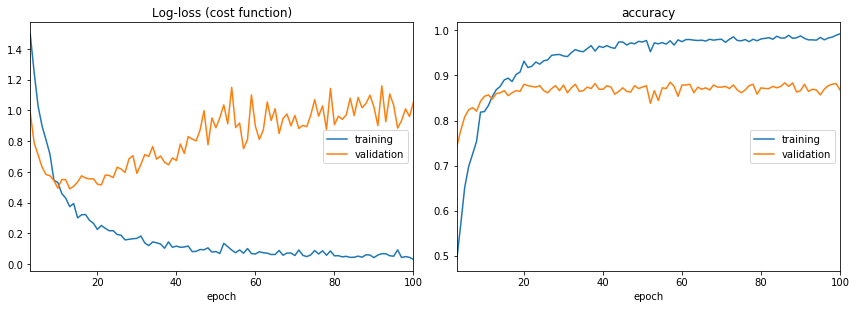

Log-loss (cost function):
training   (min:    0.029, max:    2.443, cur:    0.029)
validation (min:    0.489, max:    2.028, cur:    1.053)

accuracy:
training   (min:    0.160, max:    0.993, cur:    0.993)
validation (min:    0.505, max:    0.885, cur:    0.868)


In [38]:
#New Models
# Params for 10 GHz: epochs= 100, batch_size= 16, dense_1= 64, dense_2= 64, learn_rate= 0.0002, Accuracy=0.9115646481513977
# Params for 24 GHz: epochs= 100, batch_size= 8, dense_1= 64, dense_2= 64, learn_rate= 0.0001, Accuracy=0.9150943160057068
# Params for 77 GHz: epochs= 100, batch_size= 16, dense_1= 256, dense_2= 128, learn_rate= 0.0001, Accuracy=0.9153845906257629

radar = 24 # set flag: '10' for 10ghz, '24' for 24ghz, '2' for 77ghz, '77' for tobb 4ghz
(X_train, Y_train, X_test, Y_test) = select_data(radar)
epochs = [100]
batch_size = [8]
dense_1 = [64]
dense_2 = [64]
learn_rate = [0.0001]
drop = [0.5]

model_flag = 1
model_file = model_addr[model_flag]
weights_file = weight_addr[model_flag]

json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(weights_file)

model_name = re.split('\\/.',model_file)[-1]
weight_name = re.split('\\/.',weights_file)[-1]
    
print('Dataset: '+str(radar)+' ghz | Model: '+model_name+' | Weight: '+weight_name)

model2 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[depth].output)
model = Sequential()

model.add(model2)
model.add(Flatten())
model.add(Dense(dense_1[0], activation='relu'))
model.add(Dropout(drop[0]))

model.add(Dense(dense_2[0], activation='relu'))
model.add(Dropout(drop[0]))

model.add(Dense(num_class))
model.add(Activation('softmax'))

optim = Adam(lr=learn_rate[0], decay = 1e-06) # decay rate = 5e-06 for xethru
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                batch_size=batch_size[0],
                epochs=epochs[0],
                verbose=1,
                validation_data=(X_test, Y_test),
                shuffle=False,
                callbacks = [PlotLossesCallback()]
                     )
MODEL_FILE = "models/128x128/Auto/CNN models/"+str(radar)+" GHz "+str(depth)+"depth "+str(num_class)+"_class CAE.json" # save path
WEIGHT_FILE ="models/128x128/Auto/CNN models/"+str(radar)+" GHz "+str(depth)+"depth "+str(num_class)+"_class CAE.h5" # save path

model_json = model.to_json()
with open(MODEL_FILE, "w") as json_file:
    json_file.write(model_json)
model.save_weights(WEIGHT_FILE)

# Cross Frequency

In [50]:
modelflag = 3
model_addrs = glob.glob('models/128x128/Auto/Fine Tuned Models/*.json')
weight_addrs = glob.glob('models/128x128/Auto/Fine Tuned Models/*.h5')
print(model_addrs)
print(weight_addrs)
model_file = model_addrs[modelflag]
weights_file = weight_addrs[modelflag]

json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weights_file)
print(model_file+' & '+weights_file+ " loaded model from disk")
optim = Adam(lr=0.0001,decay = 1e-06) # decay rate = 5e-06 for xethru
loaded_model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

['models/128x128/Auto/Fine Tuned Models\\10 GHz 20depth 11_class CAE.json', 'models/128x128/Auto/Fine Tuned Models\\24 GHz 20depth 11_class CAE.json', 'models/128x128/Auto/Fine Tuned Models\\77 GHz 20depth 11_class CAE.json', 'models/128x128/Auto/Fine Tuned Models\\77_gan GHz 5depth 64filter11_class GAN CAE.json']
['models/128x128/Auto/Fine Tuned Models\\10 GHz 20depth 11_class CAE.h5', 'models/128x128/Auto/Fine Tuned Models\\24 GHz 20depth 11_class CAE.h5', 'models/128x128/Auto/Fine Tuned Models\\77 GHz 20depth 11_class CAE.h5', 'models/128x128/Auto/Fine Tuned Models\\77_gan GHz 5depth 64filter11_class GAN CAE.h5']
models/128x128/Auto/Fine Tuned Models\77_gan GHz 5depth 64filter11_class GAN CAE.json & models/128x128/Auto/Fine Tuned Models\77_gan GHz 5depth 64filter11_class GAN CAE.h5 loaded model from disk


In [58]:
radar = 24 # set flag: '10' for 10ghz, '24' for 24ghz, '2' for 77ghz, '77' for tobb 4ghz
(X_train, Y_train, X_test, Y_test) = select_data(radar)
print('\n# Evaluate on test data Model #'+str(modelflag))
results = loaded_model.evaluate(X_train, Y_train, batch_size=16)
print('test loss, test acc:', results)


# Evaluate on test data Model #3
1483/1483 [==============================] - 3s 2ms/step
test loss, test acc: [19.168254144916805, 0.10316925495862961]


## Confusion Matrix

In [ ]:
import pandas as pd
import seaborn as sn

predictions = model.predict(X_test)
Y_pred = np.argmax(predictions, axis=1)
Y_test_int = np.argmax(Y_test, axis=1)
#print(predictions[0:5])
#print(Y_pred[0:5])
#print(Y_test_int[0:5])
data = {'y_Predicted': Y_pred,
        'y_Actual':    Y_test_int
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = False)
fig3 = plt.figure()
sn.heatmap(confusion_matrix, annot=True)
#fig3.savefig('results/CAE/Conf_Model'+str(radar)+'_'+str(radar)+'GHz'+'_Batchsize'+str(BATCH_SIZE)+'_learning'+str(lr)+'_dropout'+str(drop)+'.png')
#plt.close(fig3)